In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [227]:
df = pd.read_csv("Car details v3.csv")

In [228]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [230]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [231]:
df.shape

(8128, 13)

In [232]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [233]:
print(df['fuel'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']


In [234]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# # EDA and Feature Engineering

In [235]:
final_df = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']]

In [236]:
final_df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [237]:
final_df['currontyear']=2021

In [238]:
final_df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,currontyear
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2021
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2021


In [239]:
final_df['Years_old']=final_df['currontyear']-final_df['year']

In [240]:
final_df.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,currontyear,Years_old
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2021,7
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2021,7
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2021,15
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2021,11
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,2021,14
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,2021,4
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,2021,14
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,2021,20
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,2021,10
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,2021,8


In [241]:
final_df.drop(['year'], axis=1, inplace=True)

In [242]:
final_df.drop(['currontyear'], axis=1, inplace= True)

In [243]:
final_df.drop(['torque'], axis=1, inplace= True)

In [244]:
final_df.drop(['max_power'], axis=1, inplace=True)

In [245]:
final_df.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,Years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0,7


In [247]:
# final_df['mileage'].unique()

In [248]:
final_df['mileage']=final_df['mileage'].str.strip("kmpl, km/kg")

In [249]:
final_df.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,Years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,5.0,7


In [250]:
final_df['mileage'].unique()

array(['23.4', '21.14', '17.7', '23.0', '16.1', '20.14', '17.3', '23.59',
       '20.0', '19.01', '19.3', nan, '18.9', '18.15', '24.52', '19.7',
       '22.54', '21.0', '25.5', '26.59', '21.5', '20.3', '21.4', '24.7',
       '18.2', '16.8', '24.3', '14.0', '18.6', '33.44', '23.95', '17.0',
       '20.63', '13.93', '16.0', '17.8', '18.5', '12.55', '12.99', '14.8',
       '13.5', '26.0', '20.65', '27.3', '11.36', '17.68', '14.28',
       '18.53', '14.84', '21.12', '20.36', '21.27', '18.16', '22.0',
       '25.1', '20.51', '21.66', '25.2', '22.9', '16.02', '20.54',
       '22.77', '15.71', '23.1', '19.02', '19.81', '26.2', '16.47',
       '15.04', '19.1', '21.79', '18.8', '21.21', '15.37', '11.79',
       '19.0', '14.3', '15.8', '15.1', '19.09', '22.32', '21.9', '14.53',
       '21.63', '20.85', '20.45', '19.67', '23.01', '20.77', '17.92',
       '17.01', '22.37', '19.33', '9.5', '12.83', '22.48', '16.78',
       '14.67', '15.0', '13.96', '18.0', '12.07', '26.21', '10.8', '16.3',
       '

In [251]:
final_df['engine']=final_df['engine'].str.strip("CC")

In [252]:
final_df.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,Years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,5.0,7


In [253]:
final_df['engine'].unique()

array(['1248 ', '1498 ', '1497 ', '1396 ', '1298 ', '1197 ', '1061 ',
       '796 ', '1364 ', '1399 ', '1461 ', '993 ', nan, '1198 ', '1199 ',
       '998 ', '1591 ', '2179 ', '1368 ', '2982 ', '2494 ', '2143 ',
       '2477 ', '1462 ', '2755 ', '1968 ', '1798 ', '1196 ', '1373 ',
       '1598 ', '1998 ', '1086 ', '1194 ', '1172 ', '1405 ', '1582 ',
       '999 ', '2487 ', '1999 ', '3604 ', '2987 ', '1995 ', '1451 ',
       '1969 ', '2967 ', '2497 ', '1797 ', '1991 ', '2362 ', '1493 ',
       '1599 ', '1341 ', '1794 ', '799 ', '1193 ', '2696 ', '1495 ',
       '1186 ', '1047 ', '2498 ', '2956 ', '2523 ', '1120 ', '624 ',
       '1496 ', '1984 ', '2354 ', '814 ', '793 ', '1799 ', '936 ',
       '1956 ', '1997 ', '1499 ', '1948 ', '2997 ', '2489 ', '2499 ',
       '2609 ', '2953 ', '1150 ', '1994 ', '1388 ', '1527 ', '2199 ',
       '995 ', '2993 ', '1586 ', '1390 ', '909 ', '2393 ', '3198 ',
       '1339 ', '2835 ', '2092 ', '1595 ', '2496 ', '1596 ', '1597 ',
       '2596 ', '2148 ', '

In [125]:
final_df.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,Years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,5.0,7


In [254]:
final_df['mileage'] = final_df['mileage'].astype(float)

In [255]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        7907 non-null   float64
 7   engine         7907 non-null   object 
 8   seats          7907 non-null   float64
 9   Years_old      8128 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 635.1+ KB


In [256]:
final_df['engine'].unique()

array(['1248 ', '1498 ', '1497 ', '1396 ', '1298 ', '1197 ', '1061 ',
       '796 ', '1364 ', '1399 ', '1461 ', '993 ', nan, '1198 ', '1199 ',
       '998 ', '1591 ', '2179 ', '1368 ', '2982 ', '2494 ', '2143 ',
       '2477 ', '1462 ', '2755 ', '1968 ', '1798 ', '1196 ', '1373 ',
       '1598 ', '1998 ', '1086 ', '1194 ', '1172 ', '1405 ', '1582 ',
       '999 ', '2487 ', '1999 ', '3604 ', '2987 ', '1995 ', '1451 ',
       '1969 ', '2967 ', '2497 ', '1797 ', '1991 ', '2362 ', '1493 ',
       '1599 ', '1341 ', '1794 ', '799 ', '1193 ', '2696 ', '1495 ',
       '1186 ', '1047 ', '2498 ', '2956 ', '2523 ', '1120 ', '624 ',
       '1496 ', '1984 ', '2354 ', '814 ', '793 ', '1799 ', '936 ',
       '1956 ', '1997 ', '1499 ', '1948 ', '2997 ', '2489 ', '2499 ',
       '2609 ', '2953 ', '1150 ', '1994 ', '1388 ', '1527 ', '2199 ',
       '995 ', '2993 ', '1586 ', '1390 ', '909 ', '2393 ', '3198 ',
       '1339 ', '2835 ', '2092 ', '1595 ', '2496 ', '1596 ', '1597 ',
       '2596 ', '2148 ', '

In [257]:
final_df['engine'] = final_df['engine'].astype(float)

In [258]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        7907 non-null   float64
 7   engine         7907 non-null   float64
 8   seats          7907 non-null   float64
 9   Years_old      8128 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 635.1+ KB


In [259]:
final_df.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,Years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0,7


In [260]:
final_df['mileage'].fillna(final_df["mileage"].mean(), inplace=True)

In [272]:
final_df['engine'].fillna(final_df["engine"].mean(), inplace=True)

In [286]:
final_df['seats'].replace(np.nan, 5, inplace=True)

In [287]:
final_df['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [288]:
final_df['seats'] = final_df['seats'].astype(int)

In [289]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        8128 non-null   float64
 7   engine         8128 non-null   float64
 8   seats          8128 non-null   int32  
 9   Years_old      8128 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 603.4+ KB


In [222]:
final_df.isnull().sum()

selling_price                   0
km_driven                       0
fuel                            0
owner                           0
mileage                         0
engine                          0
seats                           0
Years_old                       0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
dtype: int64

In [137]:
df_owner = df['owner']
df_fuel = df['fuel']

In [292]:
le = LabelEncoder()
le.fit(df['owner'])
le.fit(df['fuel'])

LabelEncoder()

In [297]:
df_owner = le.fit_transform(df_owner)

In [298]:
df_fuel = le.fit_transform(df_fuel)

In [299]:
df_owner

array([0, 2, 4, ..., 0, 0, 0], dtype=int64)

In [300]:
df_fuel

array([1, 1, 3, ..., 1, 1, 1], dtype=int64)

In [301]:
final_df['owner']= df_owner

In [302]:
final_df['fuel']= df_fuel

In [303]:
final_df.head(10)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,Years_old
0,450000,145500,1,Individual,Manual,0,23.40,1248.0,5,7
1,370000,120000,1,Individual,Manual,2,21.14,1498.0,5,7
2,158000,140000,3,Individual,Manual,4,17.70,1497.0,5,15
3,225000,127000,1,Individual,Manual,0,23.00,1396.0,5,11
4,130000,120000,3,Individual,Manual,0,16.10,1298.0,5,14
5,440000,45000,3,Individual,Manual,0,20.14,1197.0,5,4
6,96000,175000,2,Individual,Manual,0,17.30,1061.0,5,14
7,45000,5000,3,Individual,Manual,2,16.10,796.0,4,20
8,350000,90000,1,Individual,Manual,0,23.59,1364.0,5,10
9,200000,169000,1,Individual,Manual,0,20.00,1399.0,5,8


In [306]:
final_df = pd.get_dummies(final_df, drop_first=True)

In [307]:
final_df.head(2)

,selling_price,km_driven,fuel,owner,mileage,engine,seats,Years_old,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,450000,145500,1,0,23.40,1248.0,5,7,1,0,1
1,370000,120000,1,2,21.14,1498.0,5,7,1,0,1


In [166]:
# final_df.drop(['fuel_Diesel'], axis=1, inplace= True)

In [149]:
# final_df.drop(['fuel_LPG'], axis=1, inplace= True)

In [150]:
# final_df.drop(['fuel_Petrol'], axis=1, inplace= True)

In [167]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 8128 non-null   int64  
 1   km_driven                     8128 non-null   int64  
 2   fuel                          8128 non-null   int32  
 3   owner                         8128 non-null   int32  
 4   mileage                       8128 non-null   float64
 5   engine                        8128 non-null   float64
 6   seats                         8128 non-null   float64
 7   Years_old                     8128 non-null   int64  
 8   seller_type_Individual        8128 non-null   uint8  
 9   seller_type_Trustmark Dealer  8128 non-null   uint8  
 10  transmission_Manual           8128 non-null   uint8  
dtypes: float64(3), int32(2), int64(3), uint8(3)
memory usage: 468.4 KB


In [168]:
final_df.corr()

,selling_price,km_driven,fuel,owner,mileage,engine,seats,Years_old,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
selling_price,1.000000,-0.225534,-0.194029,-0.229174,-0.125454,0.453567,0.041161,-0.414092,-0.386244,0.035084,-0.588845
km_driven,-0.225534,1.000000,-0.265877,0.280340,-0.171426,0.203954,0.225172,0.418006,0.204736,-0.084282,0.201229
fuel,-0.194029,-0.265877,1.000000,-0.022339,-0.081697,-0.479019,-0.337139,0.050312,-0.010616,0.141610,-0.035255
owner,-0.229174,0.280340,-0.022339,1.000000,-0.158336,0.010837,0.028406,0.477249,0.219546,-0.075691,0.147458
mileage,-0.125454,-0.171426,-0.081697,-0.158336,1.000000,-0.575831,-0.452085,-0.310383,0.011640,-0.036175,0.177809
engine,0.453567,0.203954,-0.479019,0.010837,-0.575831,1.000000,0.610309,-0.017773,-0.131168,0.038698,-0.281620
seats,0.041161,0.225172,-0.337139,0.028406,-0.452085,0.610309,1.000000,0.008623,0.080633,-0.028141,0.072405
Years_old,-0.414092,0.418006,0.050312,0.477249,-0.310383,-0.017773,0.008623,1.000000,0.246161,-0.102238,0.244707
seller_type_Individual,-0.386244,0.204736,-0.010616,0.219546,0.011640,-0.131168,0.080633,0.246161,1.000000,-0.385425,0.375234
seller_type_Trustmark Dealer,0.035084,-0.084282,0.141610,-0.075691,-0.036175,0.038698,-0.028141,-0.102238,-0.385425,1.000000,-0.149677


In [186]:
final_df.head()

,selling_price,km_driven,fuel,owner,mileage,engine,seats,Years_old,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,450000,145500,1,0,23.40,1248.0,5.0,7,1,0,1
1,370000,120000,1,2,21.14,1498.0,5.0,7,1,0,1
2,158000,140000,3,4,17.70,1497.0,5.0,15,1,0,1
3,225000,127000,1,0,23.00,1396.0,5.0,11,1,0,1
4,130000,120000,3,0,16.10,1298.0,5.0,14,1,0,1


In [197]:
print(final_df['fuel'].unique())
print(final_df['owner'].unique())
print(df['owner'].unique())
print(df['seller_type'].unique())

[1 3 2 0]
[0 2 4 1 3]
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
['Individual' 'Dealer' 'Trustmark Dealer']


In [208]:
print(final_df['seats'].unique())

[ 5.          4.          5.41671936  7.          8.          6.
  9.         10.         14.          2.        ]


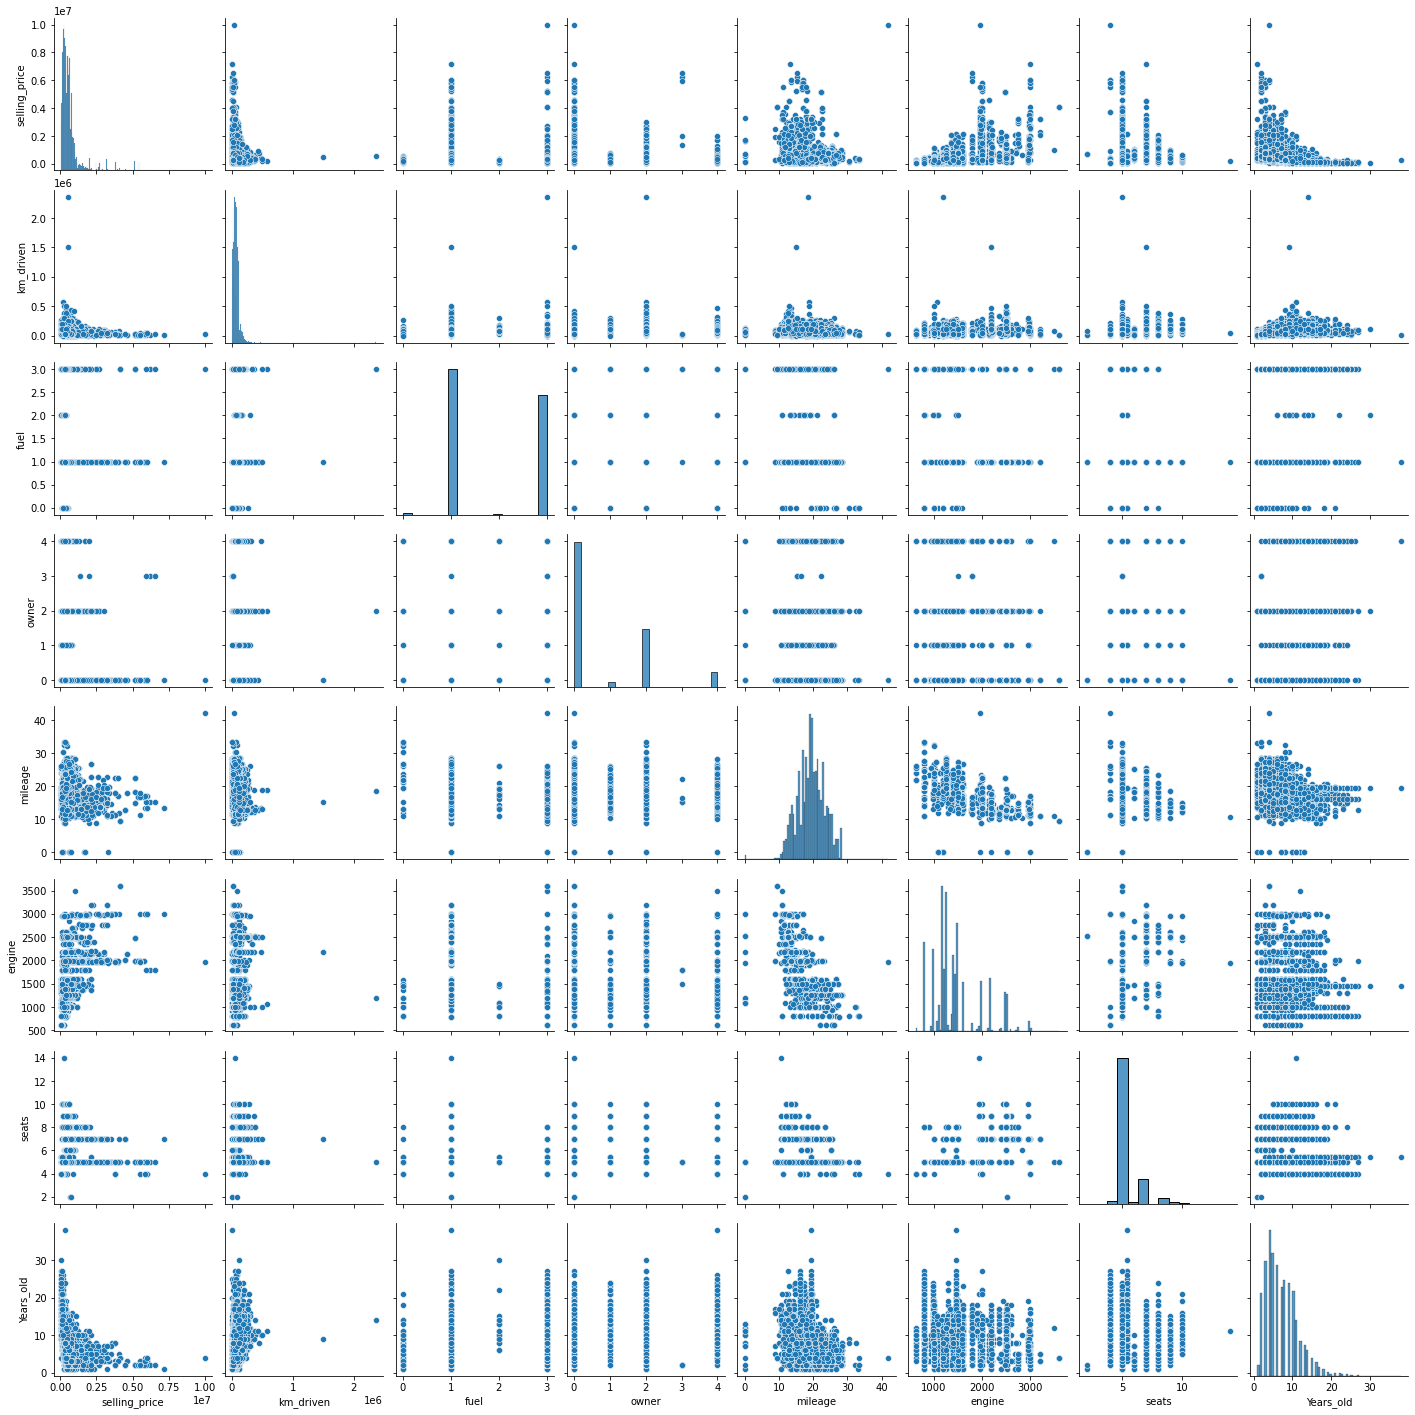

In [153]:
sns.pairplot(final_df)

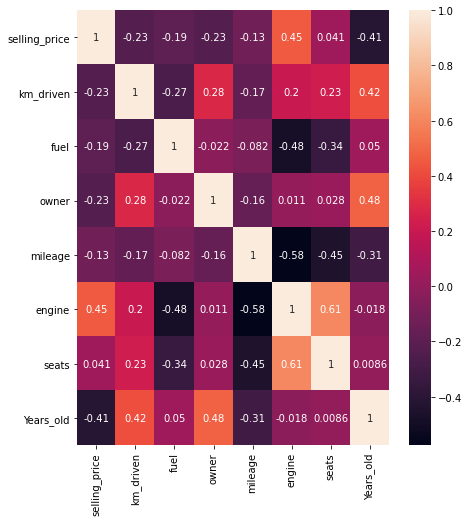

In [154]:
plt.figure(figsize=(7,8))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

In [308]:
x = final_df.drop(['selling_price'], axis=1)
y = final_df['selling_price']

In [344]:
x.head(1)

,km_driven,fuel,owner,mileage,engine,seats,Years_old,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,145500,1,0,23.4,1248.0,5,7,1,0,1


In [342]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


In [348]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 8128 non-null   int64  
 1   km_driven                     8128 non-null   int64  
 2   fuel                          8128 non-null   int64  
 3   owner                         8128 non-null   int64  
 4   mileage                       8128 non-null   float64
 5   engine                        8128 non-null   float64
 6   seats                         8128 non-null   int32  
 7   Years_old                     8128 non-null   int64  
 8   seller_type_Individual        8128 non-null   uint8  
 9   seller_type_Trustmark Dealer  8128 non-null   uint8  
 10  transmission_Manual           8128 non-null   uint8  
dtypes: float64(2), int32(1), int64(5), uint8(3)
memory usage: 500.2 KB


In [336]:
print(df['fuel'].unique())
print(final_df['fuel'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
[1 3 2 0]


In [345]:
print(df['owner'].unique())
print(final_df['owner'].unique())

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
[0 2 4 1 3]


In [346]:
print(df['seller_type'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']


In [347]:
print(df['transmission'].unique())

['Manual' 'Automatic']


In [310]:
y.head(2)

0    450000
1    370000
Name: selling_price, dtype: int64

In [311]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [312]:
model = ExtraTreesRegressor()

In [313]:
model.fit(x,y)

ExtraTreesRegressor()

In [314]:
print(model.feature_importances_)

[0.07306834 0.08838098 0.02019056 0.05982579 0.1838071  0.02177611
 0.16050193 0.04326524 0.00229017 0.34689378]


In [315]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

In [316]:
x_train.shape

(7315, 10)

In [317]:
rf_random = RandomForestRegressor()

In [318]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [319]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [320]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [321]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [322]:
rf = RandomForestRegressor()

In [323]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter=10, cv = 5, verbose=2, random_state=42, n_jobs=1)

In [324]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [351]:
predictions = rf_random.predict(x_test)

In [349]:
x.head(1)

,km_driven,fuel,owner,mileage,engine,seats,Years_old,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,145500,1,0,23.4,1248.0,5,7,1,0,1


In [355]:
test = rf_random.predict([[1000, 3, 0, 20, 1300, 5, 6, 1, 0, 1]])

In [356]:
test

array([667873.996])

C:\Users\kedar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

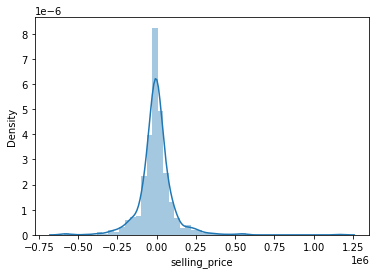

In [326]:
sns.distplot(y_test-predictions)

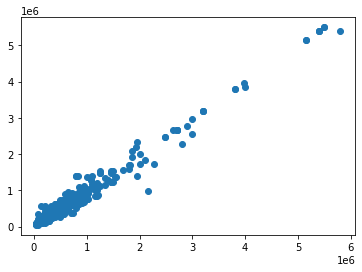

In [327]:
plt.scatter(y_test,predictions)

In [328]:
from sklearn.metrics import r2_score

In [330]:
r2_score(y_test, predictions)

0.9738924230077184

In [333]:
import pickle
file = open('CarPricePredictionModel.pkl', 'wb')
pickle.dump(rf_random, file)